In [33]:
#importing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import time
import random

In [34]:
#describe CRISP-DM

# Business understanding – What does the business need?
# Data understanding – What data do we have / need? Is it clean?
# Data preparation – How do we organize the data for modeling?
# Modeling – What modeling techniques should we apply?
# Evaluation – Which model best meets the business objectives?
# Deployment – How do stakeholders access the results?




# Business understanding – What does the business need?
# Determine business objectives: You should first “thoroughly understand, from a business perspective, what the customer really wants to accomplish.” (CRISP-DM Guide) and then define business success criteria.
# Assess situation: Determine resources availability, project requirements, assess risks and contingencies, and conduct a cost-benefit analysis.
# Determine data mining goals: In addition to defining the business objectives, you should also define what success looks like from a technical data mining perspective.
# Produce project plan: Select technologies and tools and define detailed plans for each project phase.

# II. Data Understanding
# Collect initial data: Acquire the necessary data and (if necessary) load it into your analysis tool.
# Describe data: Examine the data and document its surface properties like data format, number of records, or field identities.
# Explore data: Dig deeper into the data. Query it, visualize it, and identify relationships among the data.
# Verify data quality: How clean/dirty is the data? Document any quality issues.


# Data Preparation
# Select data: Determine which data sets will be used and document reasons for inclusion/exclusion.
# Clean data: Often this is the lengthiest task. Without it, you’ll likely fall victim to garbage-in, garbage-out. A common practice during this task is to correct, impute, or remove erroneous values.
# Construct data: Derive new attributes that will be helpful. For example, derive someone’s body mass index from height and weight fields.
# Integrate data: Create new data sets by combining data from multiple sources.
# Format data: Re-format data as necessary. For example, you might convert string values that store numbers to numeric values so that you can perform mathematical operations.

# Modeling
# Select modeling techniques: Determine which algorithms to try (e.g. regression, neural net).
# Generate test design: Pending your modeling approach, you might need to split the data into training, test, and validation sets.
# Build model: As glamorous as this might sound, this might just be executing a few lines of code like “reg = LinearRegression().fit(X, y)”.
# Assess model: Generally, multiple models are competing against each other, and the data scientist needs to interpret the model results based on domain knowledge, the pre-defined success criteria, and the test design.

#Evaluation
# Evaluate results: Do the models meet the business success criteria? Which one(s) should we approve for the business?
# Review process: Review the work accomplished. Was anything overlooked? Were all steps properly executed? Summarize findings and correct anything if needed.
# Determine next steps: Based on the previous three tasks, determine whether to proceed to deployment, iterate further, or initiate new projects.

#Deployment
# Plan deployment: Develop and document a plan for deploying the model.
# Plan monitoring and maintenance: Develop a thorough monitoring and maintenance plan to avoid issues during the operational phase (or post-project phase) of a model.
# Produce final report: The project team documents a summary of the project which might include a final presentation of data mining results.
# Review project: Conduct a project retrospective about what went well, what could have been better, and how to improve in the future.


In [35]:
# For all experiments, you should compare the technical performance on both red and white
# wine datasets.
# You should perform the following experiments:
# • Use supervised and unsupervised methods (see following sections);
# • Randomly remove 10%, 20%, and 30% of the values of the features of each dataset and
# explore two different strategies to handle missing values;
# • Experiment with data normalization, data discretization, and data reduction. Apply
# these steps to the original, unchanged, dataset.
# Don’t forget to visually explore your data, namely presenting correlations between pairs
# of features.
# The technical evaluation should include different metrics and means to better under-
# stand the errors of the supervised machine learning approaches. The assessment of the
# unsupervised machine learning approaches should compare the resulting clusters to clus-
# ters based on the quality score.

file_white_wine = 'winequality-white.csv'
file_red_wine = 'winequality-red.csv'

# Load the data
white_wine = pd.read_csv(file_white_wine, sep=';')
red_wine = pd.read_csv(file_red_wine, sep=';')

def populate_quality_values(x):
    if x > 8:
        return 4
    elif x > 6:
        return 3
    elif x > 4:
        return 2
    elif x > 2:
        return 1
    else:
        return 0


white_wine['quality'] = white_wine['quality'].apply(lambda x: populate_quality_values(x))
red_wine['quality'] = red_wine['quality'].apply(lambda x: populate_quality_values(x))



# Print the first 5 rows of the data
# print(white_wine.head())
# print(red_wine.head())


# • Randomly remove 10%, 20%, and 30% of the values of the features of each dataset and

def remove_values(data, percentage):
    # get dimensions of df
    data = data.copy()
    nrows, ncols = len(data.index), len(data.columns)         

    volume = nrows * ncols                    # total number of entries in df
    volume_to_be_nan = int(volume * percentage)      # number of entries to turn to NaN (10 %)

    # randomly generate index locations for the new NaNs
    indices = np.random.randint(volume, size=volume_to_be_nan)
    row_indices = indices % nrows
    col_indices = (indices / nrows).astype(int)

    # assign NaN to each of the indices in df
    for ri, ci in zip(row_indices, col_indices):
        data.iloc[ri, ci] = np.nan
    return data



# print(white_wine_10.head())



In [36]:


def initialize_data(white_wine, red_wine, process_function):
    y_white_wine_10 = white_wine['quality']
    x_white_wine_10 = remove_values(white_wine.drop('quality', axis=1), 0.1)
    full_white_wine_10 = x_white_wine_10
    full_white_wine_10['quality'] = y_white_wine_10
    full_white_wine_10 = process_function(full_white_wine_10)
    y_white_wine_10 = full_white_wine_10['quality']
    x_white_wine_10 = full_white_wine_10.drop('quality', axis=1)
    

    y_red_wine_10 = red_wine['quality']
    x_red_wine_10 = remove_values(red_wine.drop('quality', axis=1), 0.1)
    full_red_wine_10 = x_red_wine_10
    full_red_wine_10['quality'] = y_red_wine_10
    full_red_wine_10 = process_function(full_red_wine_10)
    y_red_wine_10 = full_red_wine_10['quality']
    x_red_wine_10 = full_red_wine_10.drop('quality', axis=1)


    y_white_wine_20 = white_wine['quality']
    x_white_wine_20 = remove_values(white_wine.drop('quality', axis=1), 0.1)
    full_white_wine_20 = x_white_wine_20
    full_white_wine_20['quality'] = y_white_wine_20
    full_white_wine_20 = process_function(full_white_wine_20)
    y_white_wine_20 = full_white_wine_20['quality']
    x_white_wine_20 = full_white_wine_20.drop('quality', axis=1)

    y_red_wine_20 = red_wine['quality']
    x_red_wine_20 = remove_values(red_wine.drop('quality', axis=1), 0.1)
    full_red_wine_20 = x_red_wine_20
    full_red_wine_20['quality'] = y_red_wine_20
    full_red_wine_20 = process_function(full_red_wine_20)
    y_red_wine_20 = full_red_wine_20['quality']
    x_red_wine_20 = full_red_wine_20.drop('quality', axis=1)


    y_white_wine_30 = white_wine['quality']
    x_white_wine_30 = remove_values(white_wine.drop('quality', axis=1), 0.1)
    full_white_wine_30 = x_white_wine_30
    full_white_wine_30['quality'] = y_white_wine_30
    full_white_wine_30 = process_function(full_white_wine_30)
    y_white_wine_30 = full_white_wine_30['quality']
    x_white_wine_30 = full_white_wine_30.drop('quality', axis=1)

    y_red_wine_30 = red_wine['quality']
    x_red_wine_30 = remove_values(red_wine.drop('quality', axis=1), 0.1)
    full_red_wine_30 = x_red_wine_30
    full_red_wine_30['quality'] = y_red_wine_30
    full_red_wine_30 = process_function(full_red_wine_30)
    y_red_wine_30 = full_red_wine_30['quality']
    x_red_wine_30 = full_red_wine_30.drop('quality', axis=1)

    # print("white wine 10% removed nullable values")
    # print(full_white_wine_10.isnull().sum())
    # print("red wine 10% removed nullable values")
    # print(full_red_wine_10.isnull().sum())
    # print("white wine 20% removed nullable values")
    # print(full_white_wine_20.isnull().sum())
    # print("red wine 20% removed nullable values")
    # print(full_red_wine_20.isnull().sum())
    # print("white wine 30% removed nullable values")
    # print(full_white_wine_30.isnull().sum())
    # print("red wine 30% removed nullable values")
    # print(full_red_wine_30.isnull().sum())

    return x_white_wine_10, y_white_wine_10, x_red_wine_10, y_red_wine_10, x_white_wine_20, y_white_wine_20, x_red_wine_20, y_red_wine_20, x_white_wine_30, y_white_wine_30, x_red_wine_30, y_red_wine_30
# print(full_red_wine_10.info())






In [37]:
# Supervised Learning Algorithms
# Experiment with the following supervised learning algorithms and comment the results,
# based on your knowledge of how they work.
# 1. Decision Trees;
# 2. Multi-layer perceptron;

# 1. Decision Trees

import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


def runDecisonTreeClassifier(x_train, y_train, x_test, y_test):
    # Create a decision tree classfifer object

    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}

    classfifer = DecisionTreeClassifier()
    dtree_gscv = GridSearchCV(classfifer, param_grid)

    # Train the model using the training sets
    dtree_gscv.fit(x_train, y_train)
    print("Best parameters set found on development set:")
    print()
    print(dtree_gscv.best_params_)
    # Make predictions using the testing set
    y_pred = dtree_gscv.predict(x_test)

    # Accuracy
    accuracy = dtree_gscv.score(x_test, y_test)
    print("Decision Tree Accuracy: ", accuracy)



In [38]:

# random forest
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

def runDecisonRandomForestClassifier(x_train, y_train, x_test, y_test):
    # Create a random forest classfifer object

    # param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}

    classfifer = RandomForestClassifier(criterion='entropy', max_depth=13)
    # dtree_gscv = GridSearchCV(classfifer, param_grid)

    # Train the model using the training sets
    classfifer.fit(x_train, y_train)
    # print("Best parameters set found on development set:")
    # {'criterion': 'entropy', 'max_depth': 13}

    # print()
    # print(dtree_gscv.best_params_)
    # Make predictions using the testing set
    y_pred = classfifer.predict(x_test)

    # Accuracy
    accuracy = classfifer.score(x_test, y_test)
    print("Random Forest Accuracy: ", accuracy)


In [39]:
# 2. Multi-layer perceptron;

import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


def runMultiLayerPerceptron(x_train, y_train, x_test, y_test):
    # Create a MLP classifier object
    param_grid = [
            {
                'activation' : ['identity', 'logistic', 'tanh', 'relu'],
                'solver' : ['lbfgs', 'sgd', 'adam'],
                'hidden_layer_sizes': [
                (1,),(2,),(3,),(4,), (5,), (6,), (7,), (8,), (9,), (10,),
                ]
            }
        ]

    
    classifier = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', solver = 'lbfgs', hidden_layer_sizes=(4,)) 
    # GridSearchCV(MLPClassifier(), param_grid, cv=3,
    #                         scoring='accuracy')
    classifier.fit(x_train,y_train)

    
    # print("Best parameters set found on development set:")
    # print(classifier.best_params_)

    # Make predictions using the testing set
    y_pred = classifier.predict(x_test)

    # Accuracy
    accuracy = classifier.score(x_test, y_test)
    print("Multi-layer Perceptron Accuracy: ", accuracy)




In [40]:
# 3. k-NN.

import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score

def runKnnClassifier(x_train, y_train, x_test, y_test):
    # Create a MLP Classifier object
    classifier = KNeighborsClassifier(n_neighbors=5)

    # Train the model using the training sets
    classifier.fit(x_train, y_train)

    # Make predictions using the testing set
    y_pred = classifier.predict(x_test)

    # Accuracy
    accuracy = classifier.score(x_test, y_test)
    print("k-NN Accuracy: ", accuracy)
    

In [41]:
# Unsupervised learning algorithms
# Experiment with the following unsupervised learning algorithms and comment the results,
# based on your knowledge of how they work.
# 1. k-Means;
# 2. DBScan;
# 3. Agglomerative hierarchical clustering.

# 1. k-Means



#import libraries
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans
    #evaluate model
from sklearn import metrics
from sklearn.metrics import pairwise_distances




def runKMeans(x_train, y_train, x_test, y_test):
    df_x_train = x_train.copy()
    df_y_train = y_train.copy()
    df_x_test = x_test.copy()
    df_y_test = y_test.copy()

    x_train = x_train.values
    y_train = y_train.values
    x_test = x_test.values
    y_test = y_test.values
    
    wcss = []
    for i in range(1,11):
        kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=12, random_state=0)
        kmeans.fit(x_train)
        wcss.append(kmeans.inertia_)
    f3, ax = plt.subplots(figsize=(8, 6))
    plt.plot(range(1,11),wcss)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
    # To determine the optimal number of clusters, 
    # we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. 
    # Thus for the given data, we conclude that the optimal number of clusters for the data is 2. 

    #Applying kmeans to the dataset, set k=2
    kmeans = KMeans(n_clusters = 2)
    start_time = time.time()
    clusters = kmeans.fit_predict(x_test)
    print("--- %s seconds ---" % (time.time() - start_time))
    labels = kmeans.labels_
    # print(labels)
    #2D plot
    colors = 'rgbkcmy'
    plt.figure(figsize=(10,8))
    for i in np.unique(clusters):
        plt.scatter(x_test[clusters==i, 0],
                x_test[clusters==i, 1],
                color=colors[i], label='Cluster' + str(i+1))
    plt.legend()
    plt.title('K-Means Clustering')
    plt.xlabel(f'Feature {df_x_test.columns[0]}')
    plt.ylabel(f'Feature {df_x_test.columns[1]}')
    plt.show()
    f1 = f1_score(y_test,  [0 if x == -1 else x for x in labels], average='weighted')
    print("F1 score: ", f1)
    # silhouette_score = metrics.silhouette_score(y_train, labels, metric='euclidean')
    # print("Silhouette score: ", silhouette_score)
    # # TODO  PCA (principle component analysis).
# from sklearn.model_selection import train_test_split

# x_train_white_10, x_test_white_10, y_train_white_10, y_test_white_10 = train_test_split(x_white_wine_10, y_white_wine_10, test_size=0.2, random_state=0)

# # print(white_wine_10.columns.values, 0.2)
# runKMeans(x_train_white_10, y_train_white_10,x_test_white_10, y_test_white_10)



In [59]:
# 2. DBScan

import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import f1_score
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
# 4.6 DBSCAN (Density Based Spatial Clustering of Applications with Noise)

# There is no automatic way to determine the MinPts value for DBSCAN. Ultimately, 
# the MinPts value should be set using domain knowledge and familiarity with the data set.
#  From some research I’ve done, here are a few rules of thumb for selecting the MinPts value:


# The larger the data set, the larger the value of MinPts should be
# If the data set is noisier, choose a larger value of MinPts
# Generally, MinPts should be greater than or equal to the dimensionality of the data set
# For 2-dimensional data, use DBSCAN’s default value of MinPts = 4 (Ester et al., 1996).
# If your data has more than 2 dimensions, choose MinPts = 2*dim, where dim= the dimensions of your data set (Sander et al., 1998).

#Epsilon is the maximum distance between two samples for them to be considered as in the same neighborhood.
# we need to calculate the average distance between all samples in the dataset.


def runDBScan(x_train, y_train, x_test, y_test):
    df_x_train = x_train.copy()
    df_y_train = y_train.copy()
    df_x_test = x_test.copy()
    df_y_test = y_test.copy()
    x_train = x_train.values
    y_train = y_train.values
    x_test = x_test.values
    y_test = y_test.values
    
    # Calculate the average distance between all samples in the dataset.
    # This is used to calculate the epsilon value.
    number_of_sampes = x_train.shape[1]*2
    print("number of samples: ", number_of_sampes)
    neighbors = NearestNeighbors(n_neighbors=number_of_sampes)
    neighbors_fit = neighbors.fit(x_train)
    distances, indices = neighbors_fit.kneighbors(x_train)
    plt.figure(figsize=(10,8))
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)
    plt.title('Average Distance Between Samples')
    plt.xlabel('Sample Index')
    plt.ylabel('Average Distance')
    plt.show()
    
    # The ideal value for ε will be equal to the distance value at the “crook of the elbow”, or the point of maximum curvature.
    optimized_epsilon = distances[int(0.96*len(distances))]
    print("Optimized Epsilon: ", optimized_epsilon)
    # Compute DBSCAN using Iris dataset
    db = DBSCAN(eps=optimized_epsilon, min_samples=number_of_sampes).fit(x_train)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print('Estimated number of clusters: %d' % n_clusters_)

    score = f1_score(y_train, [0 if x == -1 else x for x in labels], average='macro')
    print("F1 score: ", score)
    # Plot result

    # Black removed and is used for noise instead.
    plt.figure(figsize=(8, 6))
    unique_labels = set(labels)
    for each in np.linspace(0, 1, len(unique_labels)):
        for k, col in enumerate(unique_labels):

            class_member_mask = (labels == k)
            unclustored = (labels == -1)
            xy = x_train[class_member_mask & ~unclustored]
            # xy = x_train[class_member_mask & core_samples_mask]
            # print(xy[:, 1])
            plt.plot(list(xy[:, 0]), list(xy[:, 1]), 'o', 
                        markeredgecolor='k', markersize=14)

            xy = x_train[class_member_mask & ~core_samples_mask]
            plt.plot(list(xy[:, 0]), list(xy[:, 1]), 'o', 
                        markeredgecolor='k', markersize=6)

            xy = x_train[unclustored]
            plt.plot(list(xy[:, 0]), list(xy[:, 1]), 'o',
                        markeredgecolor='k', markersize=6)  


    plt.xlabel(f'Feature {df_x_train.columns[0]}')
    plt.ylabel(f'Feature {df_x_train.columns[1]}')
    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()     
# from sklearn.model_selection import train_test_split

# x_train_white_10, x_test_white_10, y_train_white_10, y_test_white_10 = train_test_split(x_white_wine_10, y_white_wine_10, test_size=0.2, random_state=0)

# runDBScanClustering(x_train_white_10, y_train_white_10)


In [43]:
# 3. Agglomerative hierarchical clustering.

import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import mean_squared_error, r2_score
from scipy.cluster.hierarchy import linkage,dendrogram


def runAgglomerativeHierarchicalClustering(x_train, y_train, x_test, y_test):
    df_x_train = x_train.copy()
    df_y_train = y_train.copy()
    df_x_test = x_test.copy()
    df_y_test = y_test.copy()

    x_train = x_train.values
    y_train = y_train.values
    x_test = x_test.values
    y_test = y_test.values
    # Create a Agglomerative hierarchical classifier object
    agglo = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

    # Fit the model with the training data
    agglo.fit(x_train)

    # Predict the cluster labels

    y_pred = agglo.fit_predict(x_train)

    # Calculate the mean squared error

    f1_score_ = f1_score(y_train, y_pred, average='macro')

    print("F1 score: ", f1_score_)


For white wine quality 10% of data
Supervised Learning Algorithms
Best parameters set found on development set:

{'criterion': 'gini', 'max_depth': 3}
Decision Tree Accuracy:  0.7353846153846154
Multi-layer Perceptron Accuracy:  0.7169230769230769
k-NN Accuracy:  0.6676923076923077
Random Forest Accuracy:  0.8
Unsupervised Learning Algorithms


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt: 


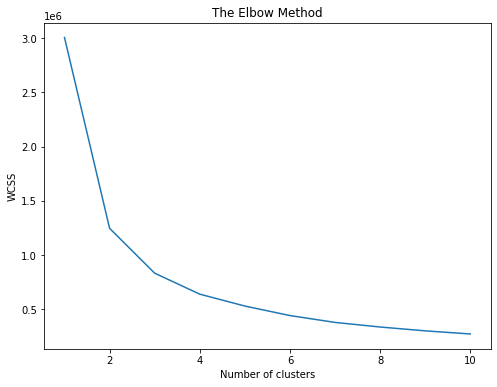

--- 0.11369657516479492 seconds ---


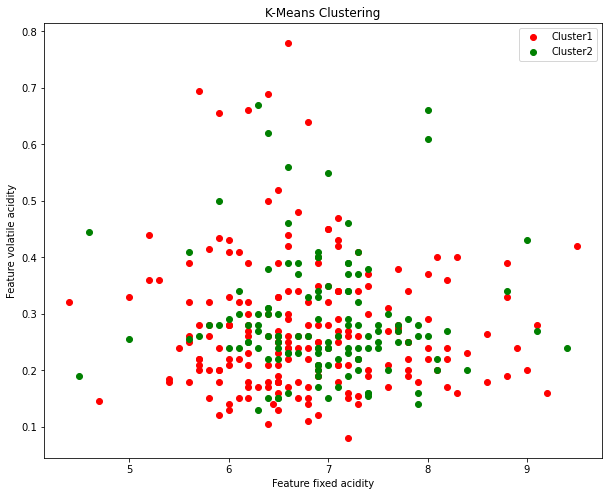

F1 score:  0.0016053511705685615
number of samples:  22


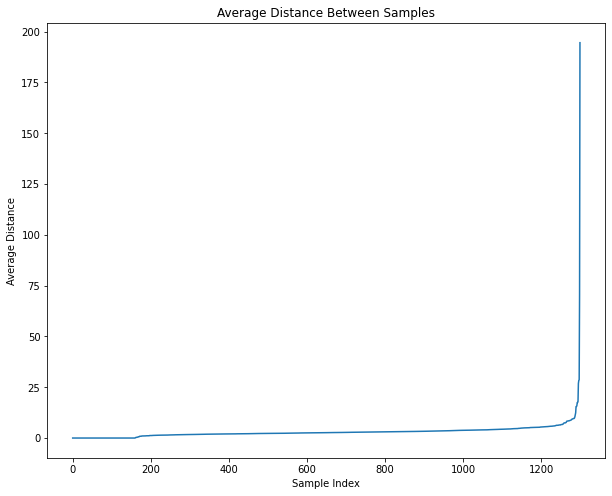

IndexError: index 1300 is out of bounds for axis 0 with size 1300

In [56]:
# Supervised learning algorithms

#test train split
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings('ignore')

def runPredictions(x_white_wine_10, y_white_wine_10, x_white_wine_20, y_white_wine_20, x_white_wine_30, y_white_wine_30):



    x_train_white_10, x_test_white_10, y_train_white_10, y_test_white_10 = train_test_split(x_white_wine_10, y_white_wine_10, test_size=0.2, random_state=0)

    # x_train_white_10, x_test_white_10, y_train_white_10, y_test_white_10 = x_train_white_10.values, x_test_white_10.values, y_train_white_10.values, y_test_white_10.values

    print("For white wine quality 10% of data")

    print("Supervised Learning Algorithms")
    runDecisonTreeClassifier(x_train_white_10, y_train_white_10, x_test_white_10, y_test_white_10)
    runMultiLayerPerceptron(x_train_white_10, y_train_white_10, x_test_white_10, y_test_white_10)
    runKnnClassifier(x_train_white_10, y_train_white_10, x_test_white_10, y_test_white_10)
    runDecisonRandomForestClassifier(x_train_white_10, y_train_white_10, x_test_white_10, y_test_white_10)

    print("Unsupervised Learning Algorithms")
    runKMeans(x_train_white_10, y_train_white_10, x_test_white_10, y_test_white_10)
    runDBScan(x_train_white_10, y_train_white_10, x_test_white_10, y_test_white_10)
    runAgglomerativeHierarchicalClustering(x_train_white_10, y_train_white_10, x_test_white_10, y_test_white_10)


    x_train_white_20, x_test_white_20, y_train_white_20, y_test_white_20 = train_test_split(x_white_wine_20, y_white_wine_20, test_size=0.2, random_state=0)

    print("For white wine quality 20% of data")

    print("Supervised Learning Algorithms")
    runDecisonTreeClassifier(x_train_white_20, y_train_white_20, x_test_white_20, y_test_white_20)
    runMultiLayerPerceptron(x_train_white_20, y_train_white_20, x_test_white_20, y_test_white_20)
    runKnnClassifier(x_train_white_20, y_train_white_20, x_test_white_20, y_test_white_20)
    runDecisonRandomForestClassifier(x_train_white_10, y_train_white_10, x_test_white_10, y_test_white_10)

    print("Unsupervised Learning Algorithms")
    runKMeans(x_train_white_10, y_train_white_10, x_test_white_10, y_test_white_10)
    runDBScan(x_train_white_10, y_train_white_10, x_test_white_10, y_test_white_10)
    runAgglomerativeHierarchicalClustering(x_train_white_10, y_train_white_10, x_test_white_10, y_test_white_10)


    x_train_white_30, x_test_white_30, y_train_white_30, y_test_white_30 = train_test_split(x_white_wine_30, y_white_wine_30, test_size=0.2, random_state=0)

    print("For white wine quality 30% of data")

    print("Supervised Learning Algorithms")
    runDecisonTreeClassifier(x_train_white_30, y_train_white_30, x_test_white_30, y_test_white_30)
    runMultiLayerPerceptron(x_train_white_30, y_train_white_30, x_test_white_30, y_test_white_30)
    runKnnClassifier(x_train_white_30, y_train_white_30, x_test_white_30, y_test_white_30)
    runDecisonRandomForestClassifier(x_train_white_10, y_train_white_10, x_test_white_10, y_test_white_10)

    print("Unsupervised Learning Algorithms")
    runKMeans(x_train_white_10, y_train_white_10, x_test_white_10, y_test_white_10)
    runDBScan(x_train_white_10, y_train_white_10, x_test_white_10, y_test_white_10)
    runAgglomerativeHierarchicalClustering(x_train_white_10, y_train_white_10, x_test_white_10, y_test_white_10)



def drop_null_values(df):
    return df.copy().dropna()


x_white_wine_10, y_white_wine_10, x_red_wine_10, y_red_wine_10, x_white_wine_20, y_white_wine_20, x_red_wine_20, y_red_wine_20, x_white_wine_30, y_white_wine_30, x_red_wine_30, y_red_wine_30 = initialize_data(white_wine, red_wine, drop_null_values)



runPredictions(x_white_wine_10, y_white_wine_10, x_white_wine_20, y_white_wine_20, x_white_wine_30, y_white_wine_30)
# runPredictions(x_red_wine_10, y_red_wine_10, x_red_wine_20, y_red_wine_20, x_red_wine_30, y_red_wine_30)



For white wine quality 10% of data
Supervised Learning Algorithms
Best parameters set found on development set:

{'criterion': 'entropy', 'max_depth': 3}
Decision Tree Accuracy:  0.828125
Multi-layer Perceptron Accuracy:  0.846875
k-NN Accuracy:  0.865625
Random Forest Accuracy:  0.878125
Unsupervised Learning Algorithms


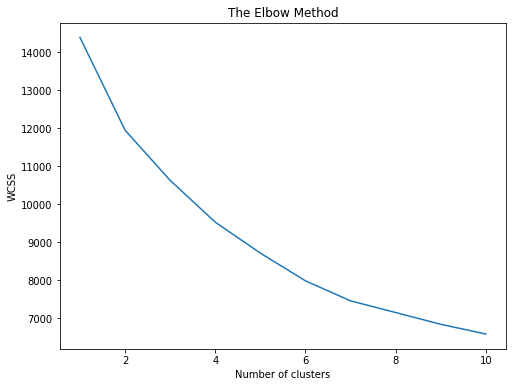

--- 0.13452553749084473 seconds ---


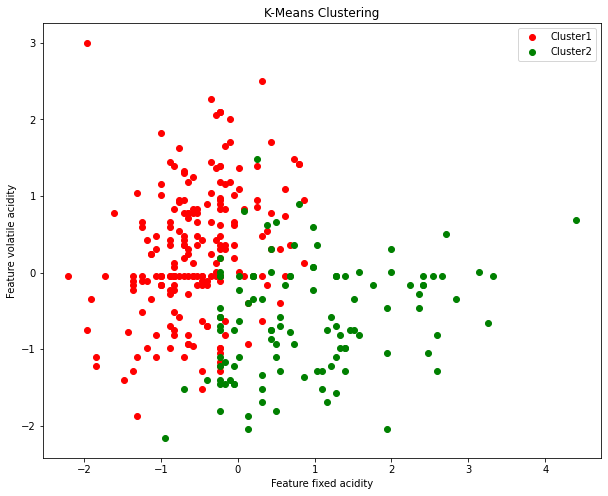

F1 score:  0.001279527559055118
number of samples:  22


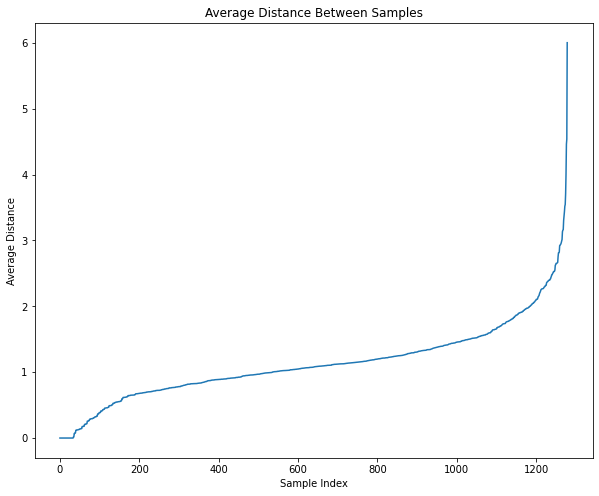

Optimized Epsilon:  3.1332852055958593
Estimated number of clusters: 1
F1 score:  0.0


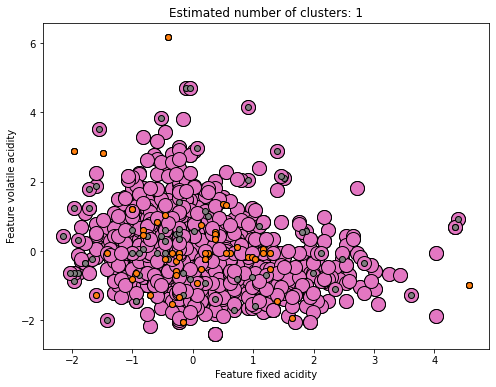

F1 score:  0.008163265306122448
For white wine quality 20% of data
Supervised Learning Algorithms
Best parameters set found on development set:

{'criterion': 'entropy', 'max_depth': 4}
Decision Tree Accuracy:  0.8375
Multi-layer Perceptron Accuracy:  0.840625
k-NN Accuracy:  0.86875
Random Forest Accuracy:  0.88125
Unsupervised Learning Algorithms


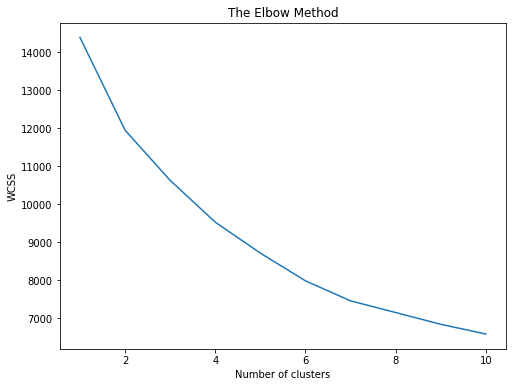

--- 0.0703423023223877 seconds ---


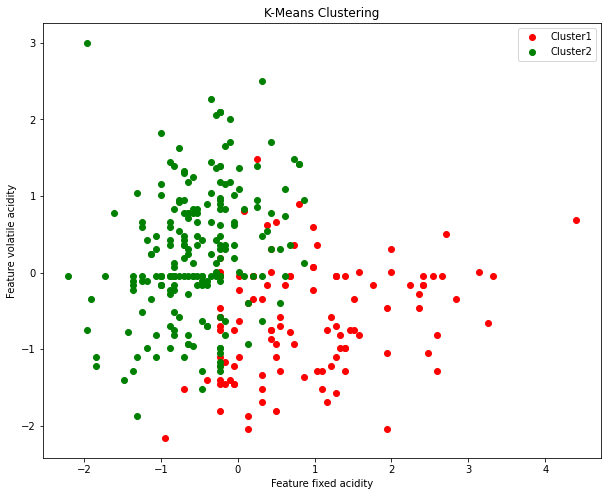

F1 score:  0.004099770642201834
number of samples:  22


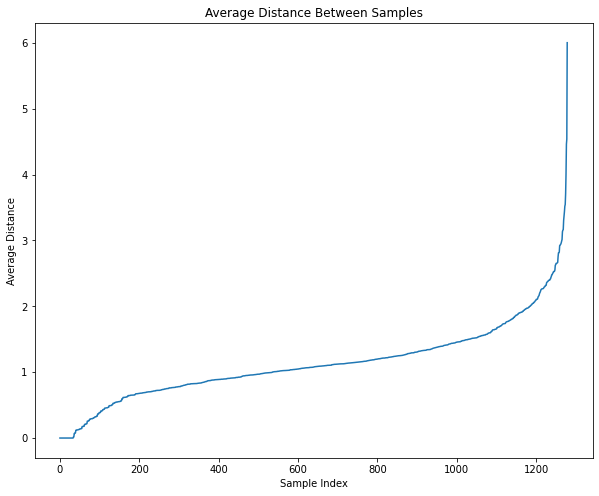

Optimized Epsilon:  3.1332852055958593
Estimated number of clusters: 1
F1 score:  0.0


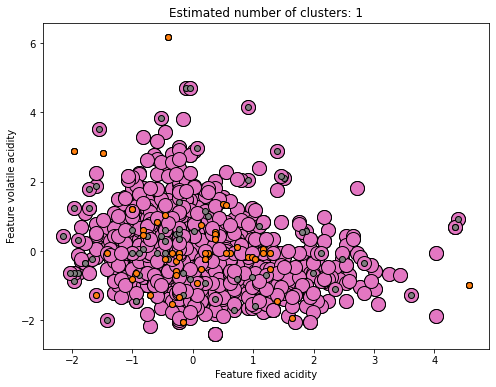

F1 score:  0.008163265306122448
For white wine quality 30% of data
Supervised Learning Algorithms
Best parameters set found on development set:

{'criterion': 'gini', 'max_depth': 4}
Decision Tree Accuracy:  0.853125
Multi-layer Perceptron Accuracy:  0.85625
k-NN Accuracy:  0.85
Random Forest Accuracy:  0.88125
Unsupervised Learning Algorithms


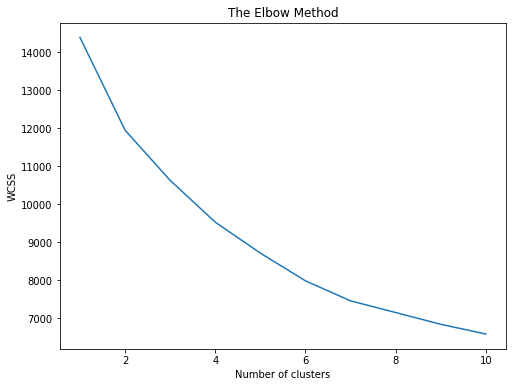

--- 0.08985376358032227 seconds ---


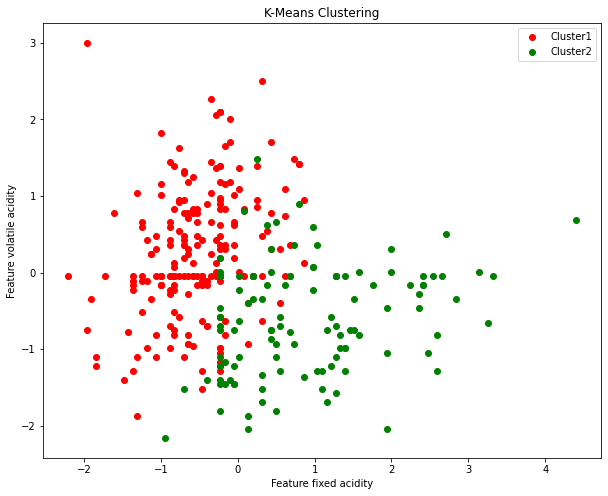

F1 score:  0.00126953125
number of samples:  22


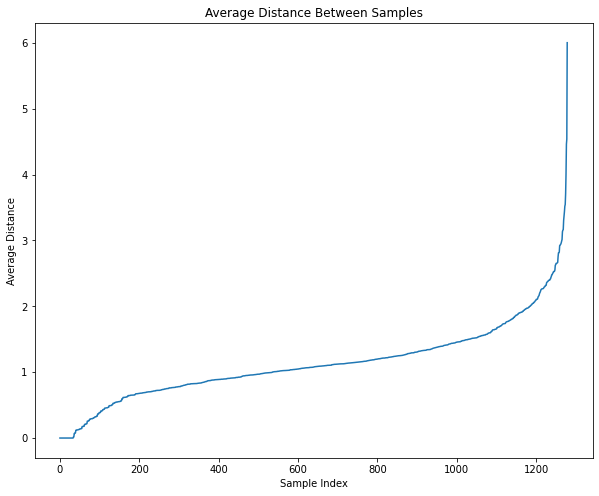

Optimized Epsilon:  3.1332852055958593
Estimated number of clusters: 1
F1 score:  0.0


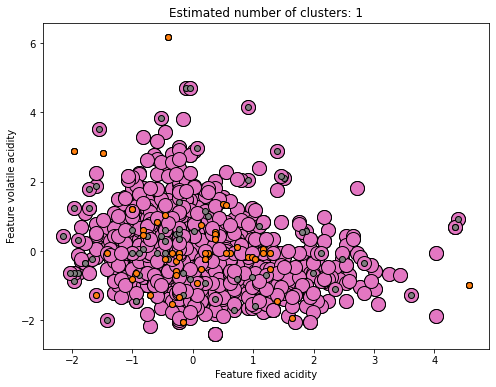

F1 score:  0.008163265306122448


In [ ]:
runPredictions(x_red_wine_10, y_red_wine_10, x_red_wine_20, y_red_wine_20, x_red_wine_30, y_red_wine_30)


For white wine quality 10% of data
Supervised Learning Algorithms
Best parameters set found on development set:

{'criterion': 'gini', 'max_depth': 4}
Decision Tree Accuracy:  0.7285714285714285
Multi-layer Perceptron Accuracy:  0.7295918367346939
k-NN Accuracy:  0.7397959183673469
Random Forest Accuracy:  0.7785714285714286
Unsupervised Learning Algorithms


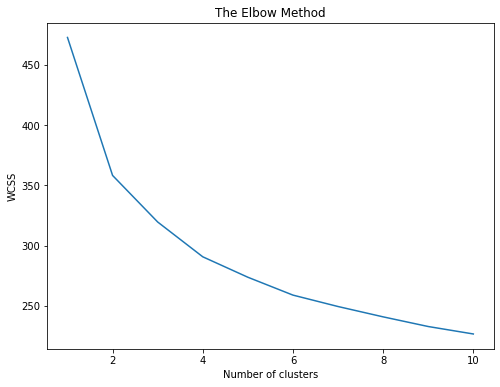

--- 0.7949352264404297 seconds ---


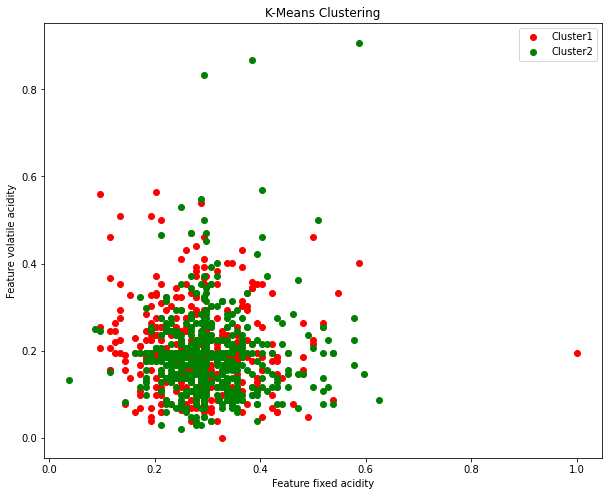

F1 score:  0.007505629221916437
number of samples:  22


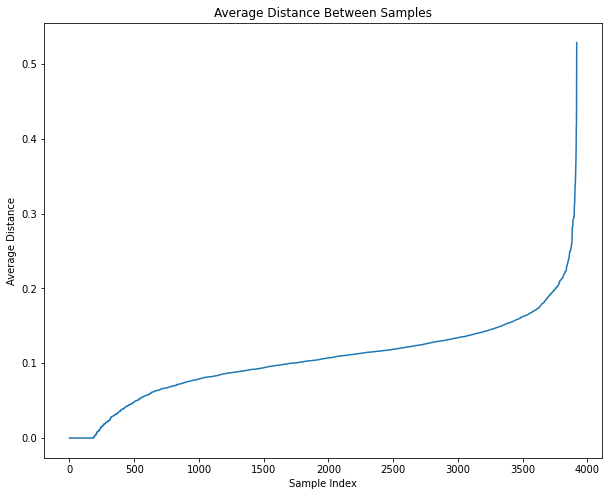

Optimized Epsilon:  0.19321033079724037
Estimated number of clusters: 1
F1 score:  0.0


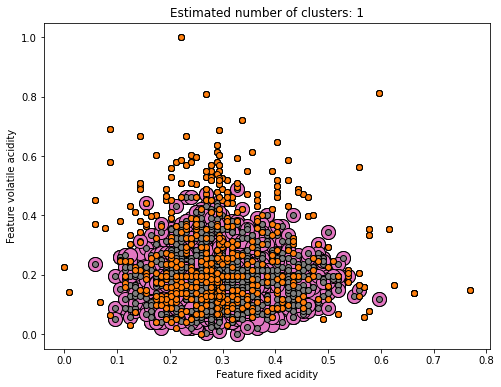

F1 score:  0.01419624217118998
For white wine quality 20% of data
Supervised Learning Algorithms
Best parameters set found on development set:

{'criterion': 'gini', 'max_depth': 5}
Decision Tree Accuracy:  0.7387755102040816
Multi-layer Perceptron Accuracy:  0.7295918367346939
k-NN Accuracy:  0.7520408163265306
Random Forest Accuracy:  0.7806122448979592
Unsupervised Learning Algorithms


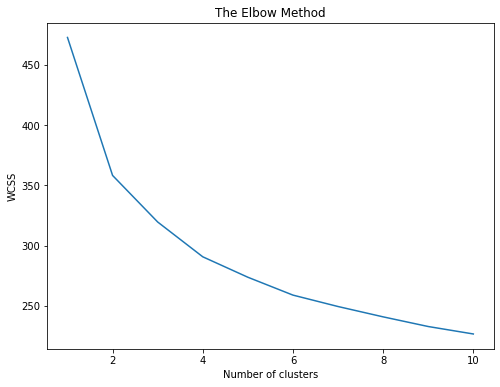

--- 0.7968621253967285 seconds ---


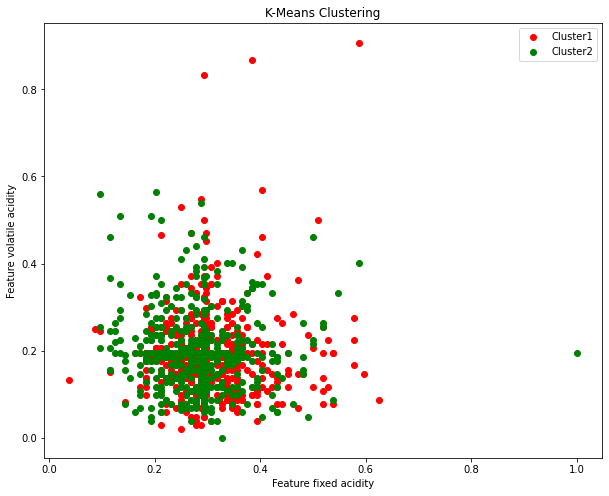

F1 score:  0.005786813780332549
number of samples:  22


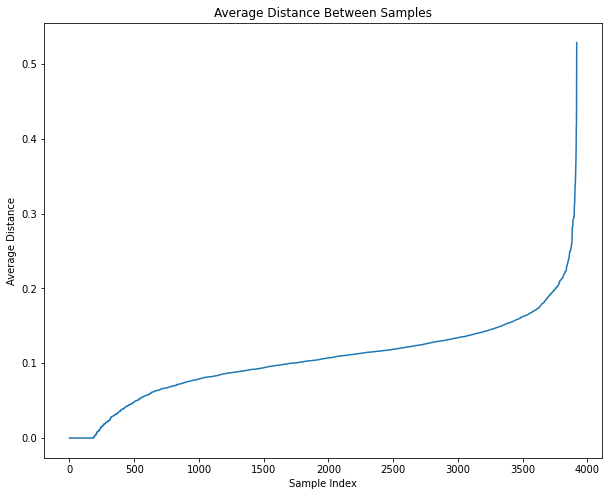

Optimized Epsilon:  0.19321033079724037
Estimated number of clusters: 1
F1 score:  0.0


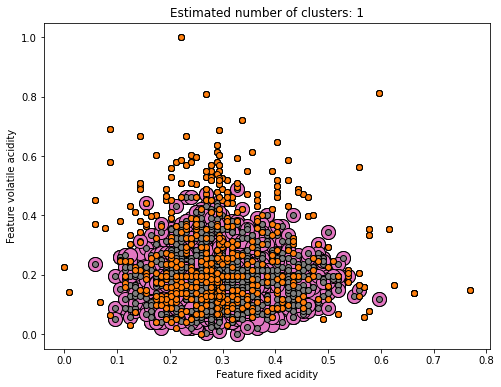

F1 score:  0.01419624217118998
For white wine quality 30% of data
Supervised Learning Algorithms
Best parameters set found on development set:

{'criterion': 'entropy', 'max_depth': 5}
Decision Tree Accuracy:  0.7387755102040816
Multi-layer Perceptron Accuracy:  0.7418367346938776
k-NN Accuracy:  0.7479591836734694
Random Forest Accuracy:  0.7836734693877551
Unsupervised Learning Algorithms


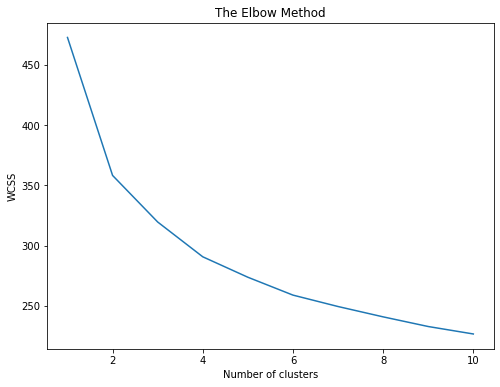

--- 0.7936451435089111 seconds ---


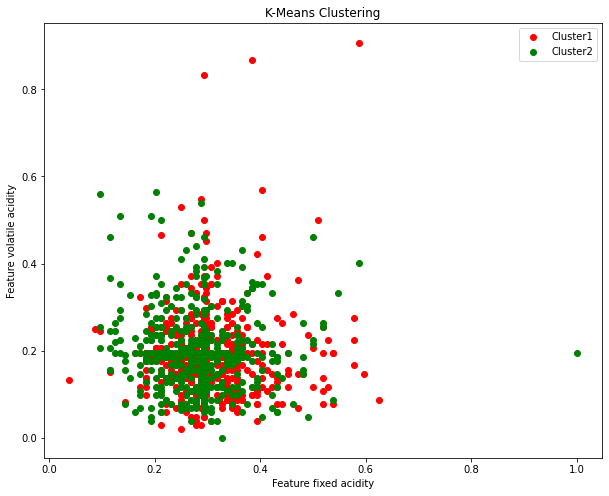

F1 score:  0.005786813780332549
number of samples:  22


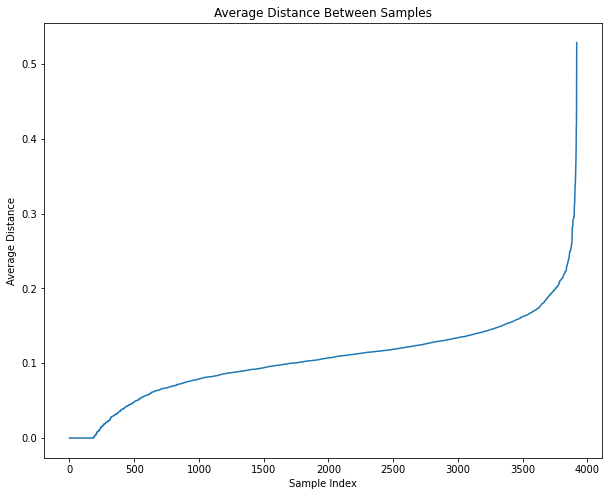

Optimized Epsilon:  0.19321033079724037
Estimated number of clusters: 1
F1 score:  0.0


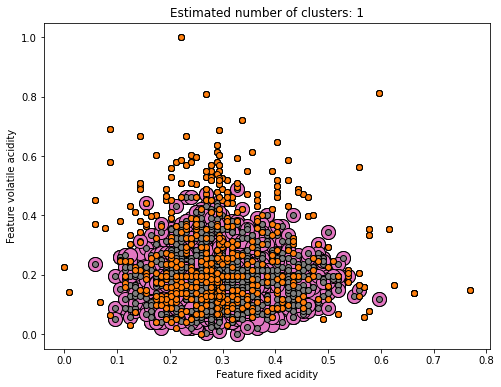

F1 score:  0.01419624217118998


In [45]:
#lets do some preprocessing for the red wine dataset


from sklearn.preprocessing import MinMaxScaler

def preprocess_min_max_scaller(df):
    df = df.copy()

    df.fillna(df.mean(), inplace=True)
    y = df['quality']
    df.drop(['quality'], axis=1, inplace=True)
    scaler = MinMaxScaler()
    df_transformed = scaler.fit_transform(df)
    df_normalized = pd.DataFrame(df_transformed, columns=list(df.columns.values))
    df_normalized['quality'] = y
    return df_normalized

def get_correlation_matrix(df):

    corr_mat=df.corr()
    #check for highly correlated values to be removed
    target = 'quality'
    candidates = corr_mat.index[
        (corr_mat[target] > 0.5) | (corr_mat[target] < -0.5)
    ].values
    candidates = candidates[candidates != target]
    print('Correlated to', target, ': ', candidates)


    # lets see the correlation between eachother by using heatmap
    fig, ax = plt.subplots(figsize=(12,8))
    mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
    sns.heatmap(df.corr(), annot=True, cmap="Reds", mask=mask, linewidth=0.5)



x_white_wine_10, y_white_wine_10, x_red_wine_10, y_red_wine_10, x_white_wine_20, y_white_wine_20, x_red_wine_20, y_red_wine_20, x_white_wine_30, y_white_wine_30, x_red_wine_30, y_red_wine_30 = initialize_data(white_wine, red_wine, preprocess_min_max_scaller)


runPredictions(x_white_wine_10, y_white_wine_10, x_white_wine_20, y_white_wine_20, x_white_wine_30, y_white_wine_30)


In [68]:
# Lets try PCA and see how it goes better on this data¶
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def apply_pca(df):
    df = df.copy()
    # print(df.head())
    df.fillna(df.median(), inplace=True)

    y_df = df['quality']

    scalar = StandardScaler()
    x_df = pd.DataFrame(scalar.fit_transform(df.drop('quality', axis=1)), columns=list(df.drop('quality', axis=1).columns.values))
    # df_scaled.head()


    pca_df = PCA(n_components=8)
    df_pca = pd.DataFrame(pca_df.fit_transform(df))
    x_df = df_pca 


    import matplotlib.pyplot as plt
    pd.DataFrame(pca_df.explained_variance_ratio_).plot.bar()
    plt.legend('')
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Varience');


    # we can see that 5 pcs are explaining 80% of target variable

    x_df['quality'] = y_df

    return x_df



x_white_wine_10, y_white_wine_10, x_red_wine_10, y_red_wine_10, x_white_wine_20, y_white_wine_20, x_red_wine_20, y_red_wine_20, x_white_wine_30, y_white_wine_30, x_red_wine_30, y_red_wine_30 = initialize_data(white_wine, red_wine, apply_pca)


# runPredictions(x_white_wine_10, y_white_wine_10, x_white_wine_20, y_white_wine_20, x_white_wine_30, y_white_wine_30)

runPredictions(x_red_wine_10, y_red_wine_10, x_red_wine_20, y_red_wine_20, x_red_wine_30, y_red_wine_30)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36             NaN      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                  NaN                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        2  
1      9.5        2  
2     10.1        2 

NameError: name 'pca_analysis_white_wine' is not defined